In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('athlete_events.csv')
df = pd.DataFrame(data)

#print(df.info())
#print(df.describe())
#print(df.head(25))

We have a dataset containing 271,116 entries and 17 columns.

In [2]:
# get a list of all the unique values in the data set

#names = df['Name'].unique()
#print(len(names))
#print(df.Name.nunique())

for x in df.columns:
    a = str(x)
    s = str(df[x].nunique())
    print(a + ' = ' + s)

ID = 135571
Name = 134732
Sex = 2
Age = 74
Height = 95
Weight = 220
Team = 1184
NOC = 230
Games = 51
Year = 35
Season = 2
City = 42
Sport = 66
Event = 765
Medal = 3


This shows the number of unique values in each column.

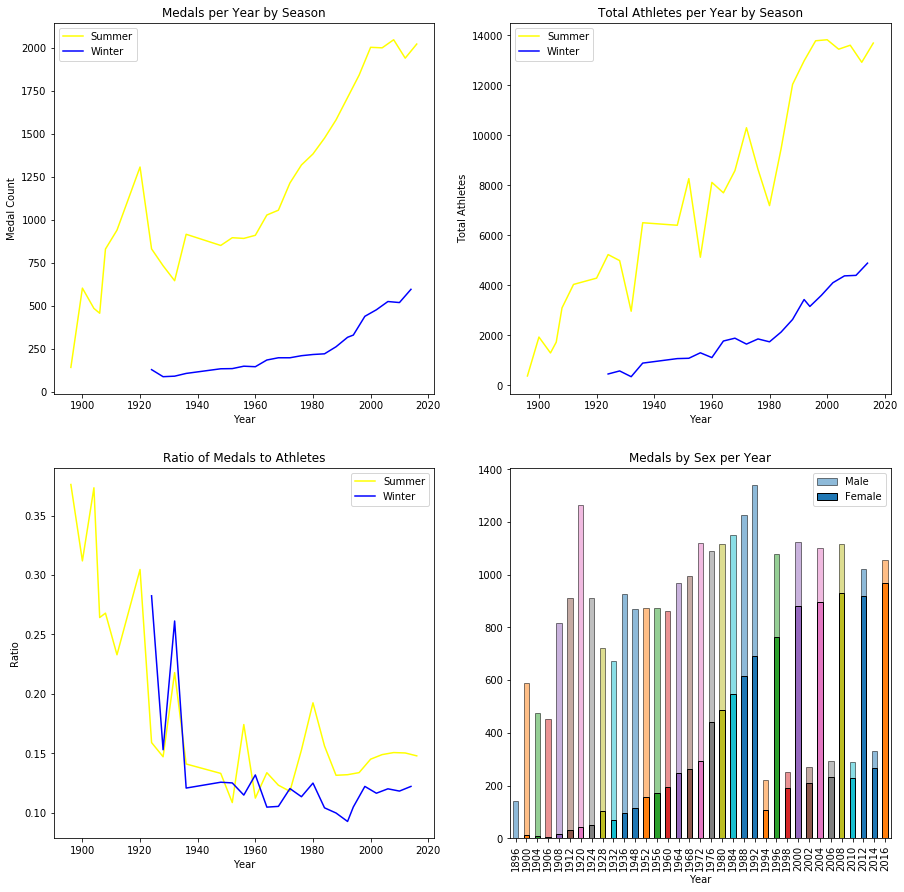

In [3]:
# medals by year separated by season
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
summer_medals_by_year = summer.groupby('Year')['Medal'].count()
winter_medals_by_year = winter.groupby('Year')['Medal'].count()
sum_of_summer_athletes_per_year = summer.groupby('Year')['Name'].count()
sum_of_winter_athletes_per_year = winter.groupby('Year')['Name'].count()
#print(summer_medals_by_year)
#print(winter_medals_by_year)
#print(sum_of_summer_athletes_per_year)
#print(sum_of_winter_athletes_per_year)

#medals per year by season 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
summer_medals_by_year.plot(kind='line', ax=ax1, color='yellow')
winter_medals_by_year.plot(kind='line', ax=ax1, title='Medals per Year by Season', color='blue')
ax1.set_ylabel('Medal Count')
leg = ax1.legend(['Summer', 'Winter'])

#total athletes per year by sesason
sum_of_summer_athletes_per_year.plot(kind='line', ax=ax2, color='yellow')
sum_of_winter_athletes_per_year.plot(kind='line', ax=ax2, color='blue', title='Total Athletes per Year by Season')
ax2.set_ylabel('Total Athletes')
leg = ax2.legend(['Summer', 'Winter'])

#ratio of medals to athlete per year
ratio_summer = summer_medals_by_year/sum_of_summer_athletes_per_year
ratio_summer.plot(kind='line', ax=ax3, color='yellow')
ratio_winter = winter_medals_by_year/sum_of_winter_athletes_per_year
ratio_winter.plot(kind='line', ax=ax3, color='blue', title='Ratio of Medals to Athletes')
ax3.set_ylabel('Ratio')
leg = ax3.legend(['Summer', 'Winter'])

#men vs women medals by year
men = df[df['Sex'] == 'M']
women = df[df['Sex'] == 'F']
mens_medals = men.groupby('Year')['Medal'].count()
womens_medals = women.groupby('Year')['Medal'].count()
womens_medals.loc[1896] = 0
womens_medals = womens_medals.sort_index()
#print(type(womens_medals))
#print(womens_medals)

df1 =  pd.concat([mens_medals, womens_medals], axis=1)
df1.columns = ['Men', 'Women']
df1['diff'] = df1['Men'] - df1['Women']
#print(df1)

mens_medals.plot(kind='bar', ax=ax4, alpha=.5, edgecolor='black')
womens_medals.plot(kind='bar', ax=ax4, edgecolor='black', title='Medals by Sex per Year')
leg = ax4.legend(['Male', 'Female'])

plt.show()
# the issue with the men vs women medal plot was that it was aligning the data for men off by 1 year 
# because the women's data started 1 year later.... 

We have 4 plots here.  The first plot (top left) shows the total medals won over the years separated by season.  The second plot (top right) shows the total athletes competing in each season per year.  The third plot (bottom left) is a ratio of the total number of medals won compared to the total number of athletes competing.  This third plot is an expression of the level of competition over time.  We can see that we approach present day the level of competition has increased (i.e. it has become harder to win a medal over time).  The final plot shows the medals won per year separated by men and women.  We can see a pretty consistent trend for medals won over time.  We clearly see that after 1992 the winter olympics start to occur in a separate year.  The winter and summer games prior to 1992 were played in the same year and the total medals reflect that in the data.

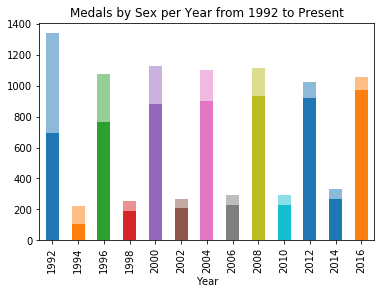

In [4]:
#show bar plot of medals by sex per year from 2000 to current
men_2000 = df[(df['Sex'] == 'M') & (df['Year'] >= 1992)]
women_2000 = df[(df['Sex'] == 'F') & (df['Year'] >= 1992)]
#men_2000 = men[men['Year'] >= 2000]
#women_2000 = women[women['Year'] >= 2000]
mens_medals = men_2000.groupby('Year')['Medal'].count()
womens_medals = women_2000.groupby('Year')['Medal'].count()
mens_medals.plot(kind='bar', alpha=.5)
womens_medals.plot(kind='bar', title='Medals by Sex per Year from 1992 to Present')
leg = ax4.legend(['Male', 'Female'])

plt.show()

#print(mens_medals)
#print(womens_medals)

This plot was used to more closely see the data from 1992 to present for total medals won by sex per year.  There was an issue with the total time plot of this plot that was caused by the start of the index for men was 1896 and the start for the 1900.

  Country  Medal Counts
0     USA          5637
1     URS          2503
2     GER          2165
3     GBR          2068
4     FRA          1777
5     ITA          1637
6     SWE          1536
7     CAN          1352
8     AUS          1320
9     RUS          1165
Medal    Gold  Silver  Bronze
NOC                          
USA    2638.0  1641.0  1358.0
URS    1082.0   732.0   689.0
GER     745.0   674.0   746.0
GBR     678.0   739.0   651.0
FRA     501.0   610.0   666.0
ITA     575.0   531.0   531.0
SWE     479.0   522.0   535.0
CAN     463.0   438.0   451.0
AUS     348.0   455.0   517.0
RUS     390.0   367.0   408.0


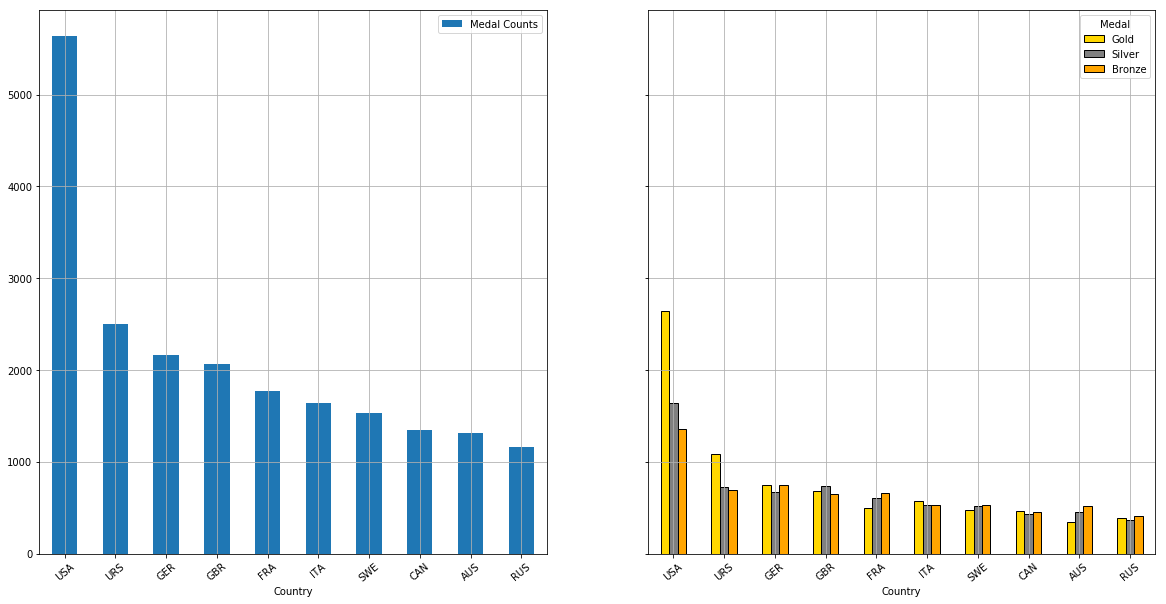

In [5]:
#grab top 10 winningest countries
team = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
team = team.reset_index()
team.columns = ['Country', 'Medal Counts']
#print(team)
top_medals = team.iloc[0:10]
print(top_medals)
#print(top_medals.nunique())
#label = top_medals.Country
#top_medals.plot(x='Country', kind='bar', rot=40)
#plt.show()

#separate top 10 countries by medal
counted = df.pivot_table(index='NOC', columns='Medal', values='Event', aggfunc='count')
counted['Totals'] = counted.sum(axis='columns')
#print(counted)
sort_counted = counted.sort_values('Totals', ascending=False)
top_counted = sort_counted.iloc[0:10]
top_counted = top_counted[['Gold', 'Silver', 'Bronze']]
print(top_counted)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), sharey=True)
top_medals.plot(x='Country', kind='bar', rot=40, ax=ax1, grid=True)
top_counted.plot(kind='bar', rot=40, ax=ax2, grid=True, color=['gold', 'grey', 'orange'],  edgecolor='black')
plt.xlabel('Country')
plt.show()


Shows the top 10 countries by total medals won over the 120 year timeframe.  The plot on the right shows the medal breakdown for each country.

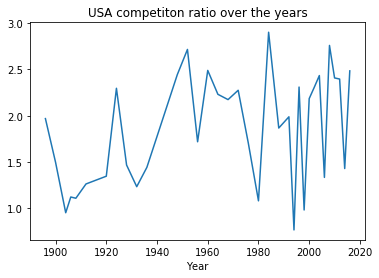

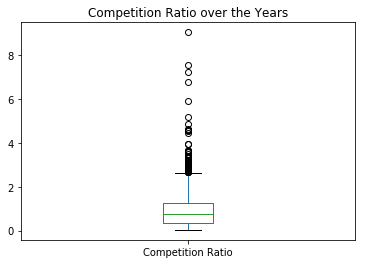

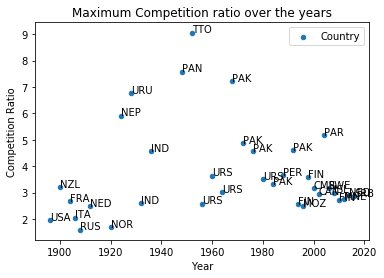

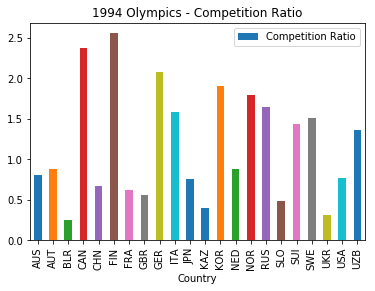

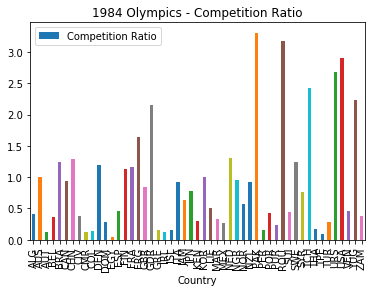

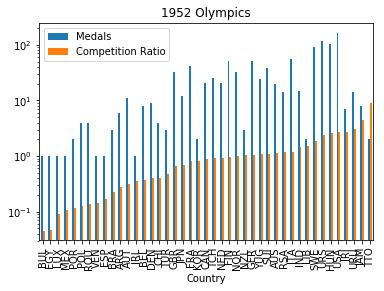

In [6]:
#sort by year and NOC
athletes_per_year = df.groupby('Year')[['Name', 'Medal']].count()
athletes_per_year.columns=['Total Athletes', 'Total Medals']
#print(athletes_per_year)
grouped_NOC = df.groupby(['Year','NOC'])['Name', 'Medal'].count()
test = pd.DataFrame(grouped_NOC).reset_index()
merge1 = pd.merge(athletes_per_year, test[['Year', 'NOC', 'Medal', 'Name']], how='outer', on='Year')
#print(merge1)

merge1.columns = ['Year', 'Total Athletes', 'Total Medals', 'Country', 'Medals', 'Athletes']
# normalized medals is the number of medals won per country for each year divided by the total number of medals won for that year
merge1['Normalized Medals'] = merge1.Medals/merge1['Total Medals']
# normalized athletes is number of athletes per country normalized by total number of athletes competeting for that year
merge1['Normalized Athletes'] = merge1.Athletes/merge1['Total Athletes']
# this is a comparision of the normalized medals to normalized athletes per year
merge1['Competition Ratio'] = merge1['Normalized Medals']/merge1['Normalized Athletes']
merge1['Ratio'] = merge1['Medals']/merge1['Athletes']
#print(merge1)

merge1a = merge1.drop(columns=['Total Athletes', 'Total Medals']).set_index(['Year', 'Country'])
#merge1a = merge1.sort_index()

#drop zeros from competition ratio
drop_zero = merge1a['Medals']==0
merge1a = merge1a.drop(merge1a.index[drop_zero])
#print(merge1a)
#print(merge1a.head(20))
#print(merge1a.loc[1896])
#print(merge1a.loc[[1896], ['Normalized Medals']].sum())
#print(merge1a.loc[[1896], ['Normalized Athletes']].sum())


# plot competition ratio over time for USA
comp_usa = merge1[merge1['Country'] == 'USA']
comp_usa = comp_usa.set_index('Year')
comp_ratio_usa = comp_usa['Competition Ratio']
comp_ratio_usa.plot(kind='line', title='USA competiton ratio over the years')

#Maximum competition ratio for each year
# *** want to create a list of Country names for each max value to display on plot ***
tot_comp_ratio = merge1[['Year', 'Competition Ratio']]
max_comp_ratio = tot_comp_ratio.groupby('Year').max()
max_comp_ratio = pd.DataFrame(max_comp_ratio).reset_index()
#print(merge1a.loc[1952])

#max_comp_ratio.plot(x='Year', y='Competition Ratio', kind='scatter', title='Maximum Competition ratio over the years')
plt.show()


#start with merge1a and unstack and calcualte max on competition ratio to find associated Country
max_country_comp = pd.DataFrame(merge1a).reset_index()
list_of_max_values = max_country_comp.groupby('Year')['Competition Ratio'].max().tolist()

max_country_comp.plot(kind='box', x='Year', y='Competition Ratio', title="Competition Ratio over the Years")
plt.show()

max_country_comp = max_country_comp[['Competition Ratio', 'Country', 'Year']]
max_country_comp = max_country_comp.set_index('Year')
max_country_comp = max_country_comp.groupby(['Year', 'Competition Ratio'])['Country'].max()
max_country_comp = max_country_comp.loc[:,list_of_max_values]
country_names = pd.DataFrame(max_country_comp).reset_index()
list_of_max_names = country_names['Country'].tolist()
#print(max_country_comp)
#print(list_of_max_values)
#print(len(list_of_max_values))
#print(list_of_countries_max)
#print(type(country_names))
#print(country_names)
#print(list_of_max_names)

#fig = plt.figure(figsize=(10,10))
country_names.plot(kind='scatter', x='Year', y='Competition Ratio', label='Country', title='Maximum Competition ratio over the years')
#list of max names = list of Country names associated with max competition ratio -> use as label for scatter plot
#create list of years -> years
years = country_names.Year.tolist()
#print(years)
#create list of competition ratio -> comp_ratio
comp_ratio = country_names['Competition Ratio'].tolist()
#print(comp_ratio)

for label, x, y in zip(list_of_max_names, years, comp_ratio):
    #print(label)
    #print(x)
    #print(y)
    plt.annotate(label, xy=(x, y))
plt.show()


#print(comp_ratio_usa.idxmin())
#print(comp_ratio_usa.idxmax())
#print(merge1a.loc[comp_ratio_usa.idxmin()])
#print(merge1a.loc[comp_ratio_usa.idxmax()])

min_comp = merge1a.loc[[comp_ratio_usa.idxmin()],['Competition Ratio']]
max_comp = merge1a.loc[[comp_ratio_usa.idxmax()],['Competition Ratio']]
min_comp = pd.DataFrame(min_comp).reset_index()
max_comp = pd.DataFrame(max_comp).reset_index()
#print(min_comp)
min_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1994 Olympics - Competition Ratio')
plt.show()
plt.clf()
plt.close()

#fig = plt.figure(figsize=(10,10))
max_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1984 Olympics - Competition Ratio')
plt.show()

#lets take a look at the 1952 olympics
df1952 = merge1a.loc[1952]
#print(df1952[['Medals', 'Athletes', 'Competition Ratio']])
#print(merge1a)
df1952_medals_comp_ratio = df1952[['Medals', 'Competition Ratio']]
df1952_medals_comp_ratio = df1952_medals_comp_ratio[df1952_medals_comp_ratio.Medals != 0].sort_values("Competition Ratio")
df1952_medals_comp_ratio.plot(kind='bar', logy=True, title='1952 Olympics')
plt.show()

These plots are based on a value created for visualition called the competition ratio.  The competition ratio is the ratio of "normalized" medals to "normalized" athletes.  These "normalized" values are found by dividing the number of medals and atheletes by the total number of medals and athletes per year.  This competition ratio can be considered a measure of the rank for each country for each year.  It is a numeric representation of the number medals won divided by number of athletes per country both normalized by their totals per year.  The last plot shows the total medals vs the competition ratio for the countries competing in the 1952 olympic games.  This was selected because it contained the maximum competition ratio value in the set.  This occurred for TTO (Trinidad and Tobago) in 1952 when they sent 2 athletes and they both won medals.  More accurate normalization will follow...

will attempt to normalize using the max-min normalization:

yi = (xi -xmin)/(xmax - xmin)

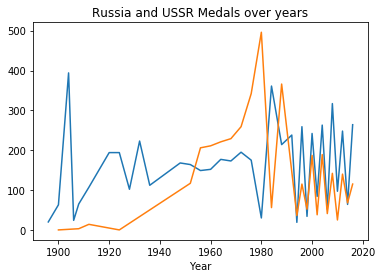

In [7]:
#grab USA medals alone
USA_grouped = df.loc[df.NOC == 'USA'].groupby('Year').count()
#print(USA_grouped.Medal.sum())

#grab RUS medals alone
RUS_grouped = df.loc[(df.NOC == 'RUS') | (df.NOC == 'URS')].groupby('Year').count()
RUS = df.loc[df.NOC == 'RUS'].groupby('Year').count()
URS = df.loc[df.NOC == 'URS'].groupby('Year').count()
#print(RUS_grouped.Medal.sum())

#check to make sure RUS was RUS the whole time and nothing else
rus_check = df['NOC'].value_counts()
#print(rus_check)
#print(RUS)
#print(URS)


#plot USA and RUS medals over time
fig, ax = plt.subplots(1)
USA_grouped.Medal.plot(x='Year', kind='line', title='USA Medals over the years', ax=ax)
RUS_grouped.Medal.plot(x='Year', kind='line', title='Russia and USSR Medals over years', ax=ax)
#RUS.Medal.plot(x='Year', kind='line', title='Russia and USSR Medals over years', ax=ax)
#URS.Medal.plot(x='Year', kind='line', title='Russia and USSR Medals over years', ax=ax)
plt.show()

# notice that 1904 sticks out significantly....And the oscillation due to the winter olympic after 1992

Russia (plus USSR) vs USA total medals over time.  Could take this one step further and analyze the over all medal counts vs the cold war (1947 - 1991).  We can clearly see that during that time period the USSR was very successful, while the USA was experiencing some of their worst medal counts. 

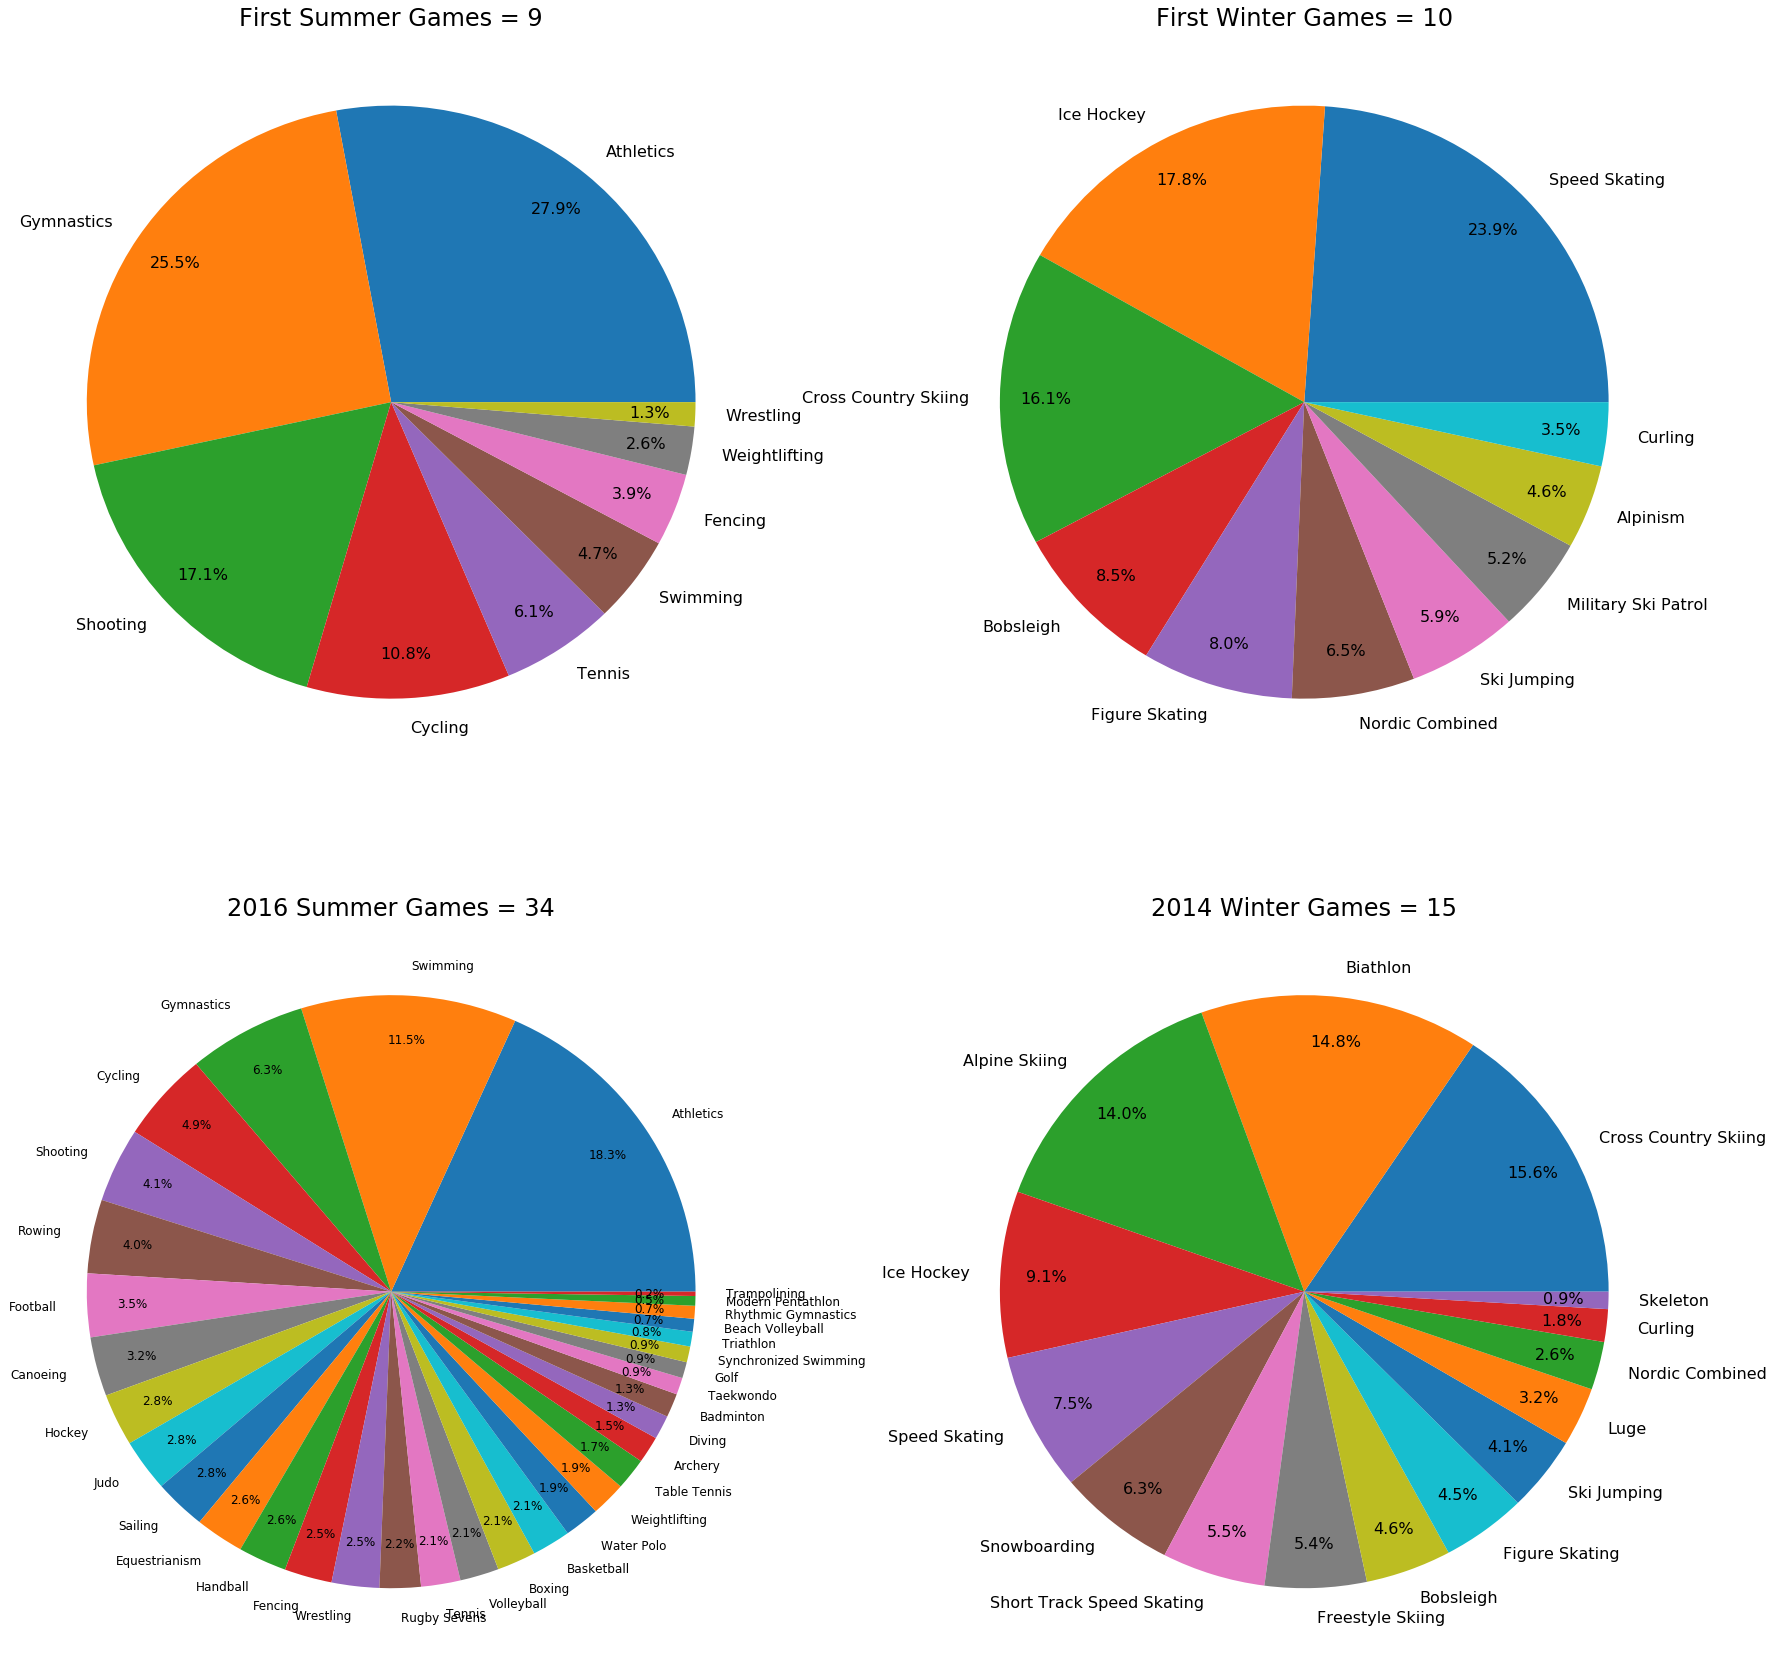

In [8]:
# show pie charts for sports in first year vs most recent year for winter and summer
# first year (summer = 1896)(winter = 1924)

df_by_year_season = df.groupby(['Year', 'Season']).count()
#print(df_by_year_season.head(10))
#print(df_by_year_season.tail(10))
first_summer = df[(df['Season'] == 'Summer') & (df['Year'] == 1896)]
first_winter = df[(df['Season'] == 'Winter') & (df['Year'] == 1924)]

first_summer_counts = first_summer.Sport.value_counts()
first_winter_counts = first_winter.Sport.value_counts()
#print(first_summer_counts)

summer1label = first_summer_counts.index.tolist()
winter1label = first_winter_counts.index.tolist()

#sports for most recent olympics (summer=2016)(winter=2014)
summer2016 = df[(df['Season'] == 'Summer') & (df['Year'] == 2016)]
summer2016_counts = summer2016.Sport.value_counts()
summer2016label = summer2016_counts.index.tolist()

winter2014 = df[(df['Season'] == 'Winter') & (df['Year'] == 2014)]
winter2014_counts = winter2014.Sport.value_counts()
winter2014label = winter2014_counts.index.tolist()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 30))
ax1.set_title('First Summer Games = 9', fontsize='24')
ax1.pie(first_summer_counts, labels=summer1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax2.set_title('First Winter Games = 10', fontsize='24')
ax2.pie(first_winter_counts, labels=winter1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax3.set_title('2016 Summer Games = 34', fontsize='24')
ax3.pie(summer2016_counts, labels=summer2016label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 12})
ax4.set_title('2014 Winter Games = 15', fontsize='24')
ax4.pie(winter2014_counts, labels=winter2014label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})

plt.show()


Pie charts showing the first games and the most recent games broken down by sport.  The percentages represent the number of events under each sport.  We can observe a large increase in the number of sports played in the Summer, while the Winter games did not change too much.

In [9]:
#create a data table grouped by year and sport for the first and present games
#print(summer1label)
#print(winter1label)
#print(summer2016label)
#print(winter2014label)

my_dict=dict({'First Summer Games':summer1label, 'First Winter Games':winter1label, '2016 Summer Games':summer2016label, '2014 Winter Games':winter2014label})
pie_table = pd.DataFrame.from_dict(my_dict, orient='index')

print(pie_table.transpose()[['First Winter Games', '2014 Winter Games', 'First Summer Games', '2016 Summer Games']])

      First Winter Games          2014 Winter Games First Summer Games  \
0          Speed Skating       Cross Country Skiing          Athletics   
1             Ice Hockey                   Biathlon         Gymnastics   
2   Cross Country Skiing              Alpine Skiing           Shooting   
3              Bobsleigh                 Ice Hockey            Cycling   
4         Figure Skating              Speed Skating             Tennis   
5        Nordic Combined               Snowboarding           Swimming   
6            Ski Jumping  Short Track Speed Skating            Fencing   
7    Military Ski Patrol           Freestyle Skiing      Weightlifting   
8               Alpinism                  Bobsleigh          Wrestling   
9                Curling             Figure Skating               None   
10                  None                Ski Jumping               None   
11                  None                       Luge               None   
12                  None            No

List of events for the first and most recent games.

In [38]:
#which athlete won the most medals?

athlete_medals = df.groupby('Name')['Medal'].count().sort_values(ascending=False)
athlete_medals_max = df.groupby('Name')['Medal'].count().max()
athlete_medals_name = athlete_medals[athlete_medals==28]
years_of_comp = df[df['Name']==athlete_medals_name.index[0]]
years_of_comp = years_of_comp[['Age', 'Year', 'Medal', 'Event', 'NOC']]
medal_breakdown_MP = years_of_comp.pivot_table(index='Year', columns='Medal', values='Event', aggfunc='count')
medal_breakdown_MP = medal_breakdown_MP[['Bronze', 'Silver', 'Gold']]
medal_breakdown_MP['Total'] = medal_breakdown_MP.sum(axis=1)

#print(athlete_medals.head())
#print(type(athlete_medals_name))
#print(athlete_medals_name.index[0])
#print(years_of_comp)
print(medal_breakdown_MP)

print('The olympian who won the most medals is {}.\nThe number of medals won is:  {}'.format(athlete_medals_name.index[0], athlete_medals_max))
print('{} won {} Gold medals, {} Silver medals, and {} Bronze medals'.format(athlete_medals_name.index[0], int(medal_breakdown_MP['Gold'].sum()), int(medal_breakdown_MP['Silver'].sum()), int(medal_breakdown_MP['Bronze'].sum())))
print('{} competes for team {}'.format(athlete_medals_name.index[0], years_of_comp['NOC'].values[0]))


#find top female medal winner
females = df[df['Sex'] == 'F']
female_medals = females.groupby('Name')['Medal'].count().sort_values(ascending=False)
female_medals_max = females.groupby('Name')['Medal'].count().max()
female_medals_name = female_medals[female_medals==18]
years_of_comp_female = df[df['Name']==female_medals_name.index[0]]
years_of_comp_female = years_of_comp_female[['Age', 'Year', 'Medal', 'Event', 'NOC']]
medal_breakdown_LSL = years_of_comp_female.pivot_table(index='Year', columns='Medal', values='Event', aggfunc='count')
medal_breakdown_LSL = medal_breakdown_LSL[['Bronze', 'Silver', 'Gold']]
medal_breakdown_LSL['Total'] = medal_breakdown_LSL.sum(axis=1)
#print(female_medals_max)
#print(female_medals)
#print(female_medals_name.index[0])
#print(years_of_comp_female)
print(medal_breakdown_LSL)

print('The female olympian who won the most medals is {}.\nThe number of medals won is:  {}'.format(female_medals_name.index[0], female_medals_max))
print('{} won {} Gold medals, {} Silver medals, and {} Bronze medals'.format(female_medals_name.index[0], int(medal_breakdown_LSL['Gold'].sum()), int(medal_breakdown_LSL['Silver'].sum()), int(medal_breakdown_LSL['Bronze'].sum())))
print('{} competes for team {}'.format(female_medals_name.index[0], years_of_comp_female['NOC'].values[0]))

Medal  Bronze  Silver  Gold  Total
Year                              
2004      2.0     NaN   6.0    8.0
2008      NaN     NaN   8.0    8.0
2012      NaN     2.0   4.0    6.0
2016      NaN     1.0   5.0    6.0
The olympian who won the most medals is Michael Fred Phelps, II.
The number of medals won is:  28
Michael Fred Phelps, II won 23 Gold medals, 3 Silver medals, and 2 Bronze medals
Michael Fred Phelps, II competes for team USA
Medal  Bronze  Silver  Gold  Total
Year                              
1956        1       1     4      6
1960        1       2     3      6
1964        2       2     2      6
The female olympian who won the most medals is Larysa Semenivna Latynina (Diriy-).
The number of medals won is:  18
Larysa Semenivna Latynina (Diriy-) won 9 Gold medals, 5 Silver medals, and 4 Bronze medals
Larysa Semenivna Latynina (Diriy-) competes for team URS


still to come....

NEED TO ANSWER AT LEAST 2 MORE ANALYTICAL QUESTIONS!!!
*Cold War analysis
*Max/Min normalization
*Bayesian predictor model?

THOUGHTS ON HOW TO CONTINUE.....?
*Add geographic data or GDP data to improve model building
    *also could show plots of country size vs total medals or apperances


FORMATTING/EDITING!

